In [155]:
import os
import pandas as pd
import datetime
import calendar

import matplotlib.pyplot as plt

### Merging 12 months data into a single file

In [156]:
# df = pd.read_csv("./data/Sales_April_2019.csv")

files = [file for file in os.listdir('./data') if not file.startswith('.')]

all_MonthsData = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/" + file)
    all_MonthsData = pd.concat([all_MonthsData, df])
    
all_MonthsData.to_csv("yearlyData.csv", index=False)

In [157]:
yearly_data = pd.read_csv("yearlyData.csv")
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Cleaning data

In [158]:
nan_df = yearly_data[yearly_data.isna().any(axis=1)]
# nan_df.head()

yearly_data = yearly_data.dropna(how = 'all')
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Removing unnecessary 'Or' values

In [159]:
yearly_data = yearly_data[yearly_data['Order Date'].str[0:2] != 'Or']
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [160]:
yearly_data['Quantity Ordered'] = pd.to_numeric(yearly_data['Quantity Ordered'])
yearly_data['Price Each'] = pd.to_numeric(yearly_data['Price Each'])

## Adding extra columns for visualisation

### Subtask (1) -> Adding MONTH column

In [161]:
yearly_data['Month'] = (yearly_data['Order Date'].str[0:2]).astype('int32')

yearly_data['Month Name'] = (yearly_data['Order Date'].str[0:2]).astype('int32')

# month = datetime.date(1900, (), 1).strftime('%B')
yearly_data['Month Name'] = yearly_data['Month Name'].apply(lambda x: calendar.month_abbr[x])


yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,Nov
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Nov
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Nov
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Nov
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Nov


### Subtask(2) -> Adding SALES column

In [162]:
yearly_data['Sales'] = yearly_data['Quantity Ordered'] * yearly_data['Price Each']
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,Nov,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Nov,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Nov,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Nov,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Nov,99.99


### Subtask(4) -> Adding CITY column

In [163]:
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

# yearly_data = yearly_data.drop(columns='Month', inplace=Tue)

yearly_data['City'] = yearly_data['Purchase Address'].apply(lambda x: f"{getCity(x)} ({getState(x)})")

yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,Nov,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Nov,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Nov,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Nov,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Nov,99.99,Boston (MA)


### What was the best month for sales? How much was earned that month?

In [164]:
# yearly_data.groupby('Month').sum()
results = yearly_data.groupby('Month').sum()

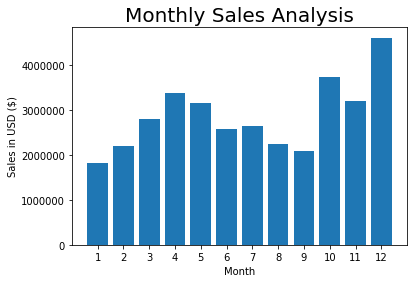

In [165]:
months = range(1, 13)

plt.title('Monthly Sales Analysis', fontsize=20)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

### What city has the highest number of sales?

In [166]:
results = yearly_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


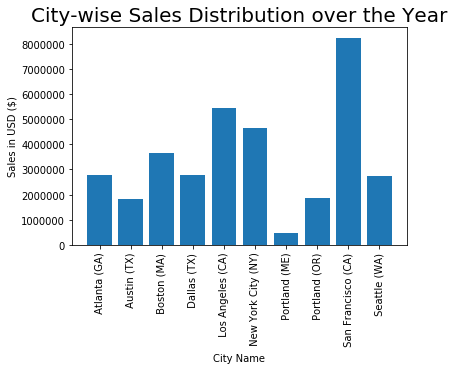

In [167]:
cities = [city for city, df in yearly_data.groupby('City')]
# keeping the order

plt.bar(cities, results['Sales'])
plt.title('City-wise Sales Distribution over the Year', fontsize=20)
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### What time should we ADVERTISE to maximize likelihood of customer's buying product?

In [168]:
yearly_data['Order Date'] = pd.to_datetime(yearly_data['Order Date'])

yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,Nov,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,Nov,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,Nov,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,Nov,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,Nov,99.99,Boston (MA)


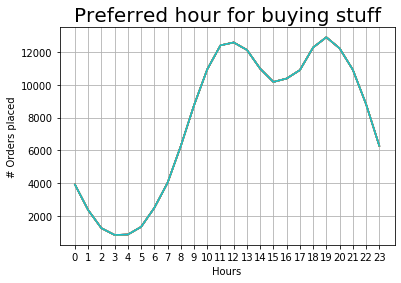

In [169]:
yearly_data['Hour'] = yearly_data['Order Date'].dt.hour

hours = [hour for hour, df in yearly_data.groupby('Hour')]
plt.plot(hours, yearly_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.title('Preferred hour for buying stuff', fontsize=20)
plt.xlabel('Hours')
plt.ylabel('# Orders placed')
plt.grid()
plt.show()

### Which Products are SOLD TOGETHER ! (important)

In [170]:
df = yearly_data[yearly_data['Order ID'].duplicated(keep=False)]
# 'False' since we want to keep all duplicates

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/home/satyam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
9,278806,"Bose SoundSport Headphones, ThinkPad Laptop"
15,278811,"Wired Headphones, Apple Airpods Headphones"
24,278819,"iPhone, Apple Airpods Headphones"
39,278833,"iPhone, Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones, 27in FHD Monitor"


In [171]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    rowList = row.split(',')
    count.update(Counter( combinations(rowList, 3)) )
# search for 'N(here=3)' number of items sold together

# count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', ' USB-C Charging Cable', ' Wired Headphones') 87
('iPhone', ' Lightning Charging Cable', ' Wired Headphones') 62
('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones') 47
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 35
('Vareebadd Phone', ' USB-C Charging Cable', ' Wired Headphones') 33
('iPhone', ' Apple Airpods Headphones', ' Wired Headphones') 27
('Google Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 24
('Vareebadd Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 16
('Vareebadd Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 5
(' USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones') 5


### Which was the MOST POPULAR PRODUCT that was sold ?

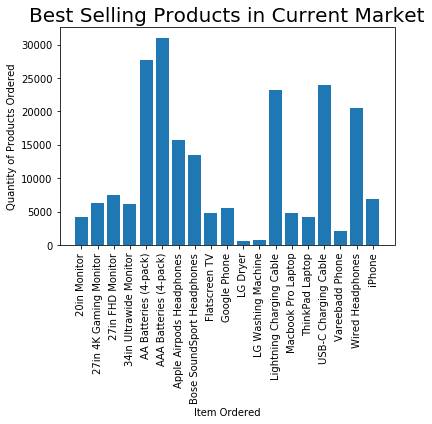

In [172]:
productData = yearly_data.groupby('Product')
totalOrdered = productData.sum()['Quantity Ordered']

products = [product for product, df in productData]

plt.bar(products, totalOrdered)
plt.title('Best Selling Products in Current Market', fontsize=20)
plt.xlabel('Item Ordered')
plt.ylabel('Quantity of Products Ordered')
plt.xticks(products, rotation='vertical')
plt.show()

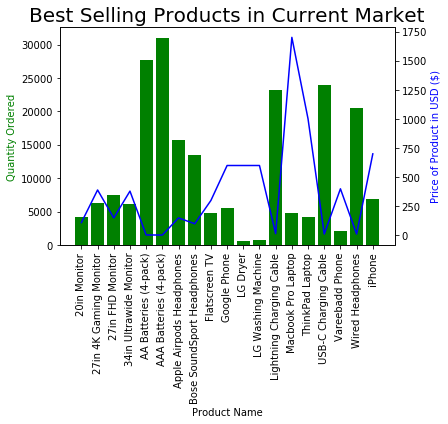

In [173]:
pricesEach = yearly_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, totalOrdered, color='g')
ax2.plot(products, pricesEach, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price of Product in USD ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical')
plt.title('Best Selling Products in Current Market', fontsize=20)

plt.show()